# Project 2: Ames Housing Data and [Kaggle Challenge](https://www.kaggle.com/c/dsi-us-8-project-2-regression-challenge/)

Predicting house prices based on a long series of features describing various different aspects of a house

## Problem Statement

Using the well known Ames housing data, as well as a guide in the form of an [Ames Housing .txt file](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), I created a regression model that predicts the price of houses in Ames, Iowa.  It required a lot of data cleaning (fixing null values appropriately and dropping unneeded information), and I did some evaluation of the correlations to determine which features had the most impact on price (both positively and negatively).



## Executive Summary


My aim was to predict the sales price for each house in the provided testing data. For each Id in the test set, I had to predict the value of the SalePrice variable.  I was doing this to submit to [Kaggle](https://www.kaggle.com/) as part of a [competition](https://www.kaggle.com/c/dsi-us-8-project-2-regression-challenge/) (so the final data had to be submitted very particularly), where [Kaggle](https://www.kaggle.com/c/dsi-us-8-project-2-regression-challenge/) leaderboard standings will be determined by root mean squared error (RMSE).


### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Dummy Variables](#Dummy-Variables)
- [Which neighborhoods are the best investment?](#Which-neighborhoods-are-the-best-investment?)
- [Make sure each data set has the same columns](#Make-sure-each-data-set-has-the-same-columns)
- [Features with strongest and weakest correlations to Sale Price](#Features-with-strongest-and-weakest-correlations-to-Sale-Price)
- [Fitting The Model](#Fitting-The-Model)
- [Preparing Submissions To Submit to Kaggle](#Preparing-Submissions-To-Submit-to-Kaggle)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Source Documentation](#Source-Documentation)

*All libraries used are added here*

In [1]:
#Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

## Data Import and Cleaning

#### 1. Read In Ames Housing Training Data

Read in the `train.csv` and `test.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
#read train.csv into 'train'
train = pd.read_csv('./datasets/train.csv')

#read test.csv into 'test'
test = pd.read_csv('./datasets/test.csv')

In [3]:
#code
#save the original clean train.csv data (saved as train) and export into a .csv file in our current lab folder
# just in case we need to reference it so it doesn't get accidentally permanently deleted
train.to_csv('./datasets/clean_train.csv', index=False)

#save the original clean test.csv data (saved as train) and export into a .csv file in our current lab folder
# just in case we need to reference it so it doesn't get accidentally permanently deleted
test.to_csv('./datasets/clean_test.csv', index=False)

#### I had to be careful to do everything that I did for the train to the test so that I could use the same model on both

In [4]:
#Code:
#return first 10 values of train.csv
train.head(n=10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [5]:
#check first 5 values of test.csv
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
#find the shape (rows, columns) of the train dataset
train.shape

(2051, 81)

In [7]:
#find the shape (rows, columns) of the test dataset
test.shape
# Note that train has one more column then test.  This is due to the 'SalePrice' column

(879, 80)

In [8]:
#count how many null values overall in the dataframe
train.isnull().sum().sum()

9822

In [9]:
#count how many null values overall in the dataframe
test.isnull().sum().sum()

4175

In [10]:
#replace columns where NA values are represented as something specific with that value
# these were explicitly specified by the document AmesHousing.txt that we were provided
train['Alley'].fillna('No Alley', inplace=True)
train['Bsmt Qual'].fillna('No Basement', inplace=True)
train['Bsmt Cond'].fillna('No Basement', inplace=True)
train['Bsmt Exposure'].fillna('No Basement', inplace=True)
train['BsmtFin Type 1'].fillna('No Basement', inplace=True)
train['BsmtFin Type 2'].fillna('No Basement', inplace=True)
train['Fireplace Qu'].fillna('No Fireplace', inplace=True)
train['Garage Type'].fillna('No Garage', inplace=True)
train['Garage Finish'].fillna('No Garage', inplace=True)
train['Garage Qual'].fillna('No Garage', inplace=True)
train['Garage Cond'].fillna('No Garage', inplace=True)
train['Pool QC'].fillna('No Pool', inplace=True)
train['Fence'].fillna('No Fence', inplace=True)
train['Misc Feature'].fillna('None', inplace=True)


In [11]:
#see where null values are.  Notice how the bulk of have them dropped
train.isnull().sum().sum()

498

In [12]:
#in test: replace columns where NA values are represented as something specific with that value
# do this to match what we did to the train Dataframe
test['Alley'].fillna('No Alley', inplace=True)
test['Bsmt Qual'].fillna('No Basement', inplace=True)
test['Bsmt Cond'].fillna('No Basement', inplace=True)
test['Bsmt Exposure'].fillna('No Basement', inplace=True)
test['BsmtFin Type 1'].fillna('No Basement', inplace=True)
test['BsmtFin Type 2'].fillna('No Basement', inplace=True)
test['Fireplace Qu'].fillna('No Fireplace', inplace=True)
test['Garage Type'].fillna('No Garage', inplace=True)
test['Garage Finish'].fillna('No Garage', inplace=True)
test['Garage Qual'].fillna('No Garage', inplace=True)
test['Garage Cond'].fillna('No Garage', inplace=True)
test['Pool QC'].fillna('No Pool', inplace=True)
test['Fence'].fillna('No Fence', inplace=True)
test['Misc Feature'].fillna('None', inplace=True)


In [13]:
#see where null values are.  Notice how the bulk of have them dropped
test.isnull().sum().sum()

208

In [14]:
#replace columns where there are no values for a feature because house doesnt have said feature with 0
# we know already from the document AmesHousing.txt that we were provided that a lot of these houses 
# had no basement, no garage, no pool.  

train['BsmtFin SF 1'].fillna(0, inplace=True)
train['BsmtFin SF 2'].fillna(0, inplace=True)
train['Bsmt Unf SF'].fillna(0, inplace=True)
train['Total Bsmt SF'].fillna(0, inplace=True)
train['Bsmt Full Bath'].fillna(0, inplace=True)
train['Bsmt Half Bath'].fillna(0, inplace=True)

train['Garage Yr Blt'].fillna(0, inplace=True)
train['Garage Cars'].fillna(0, inplace=True)
train['Garage Area'].fillna(0, inplace=True)


train['Pool Area'].fillna(0, inplace=True)

In [15]:
#see where null values are.  Notice how many more have dropped
train.isnull().sum().sum()

374

In [16]:
#in test: replace columns where there are no values for a feature because house doesnt have said feature with 0
# do this to match what we did to the train Dataframe

test['BsmtFin SF 1'].fillna(0, inplace=True)
test['BsmtFin SF 2'].fillna(0, inplace=True)
test['Bsmt Unf SF'].fillna(0, inplace=True)
test['Total Bsmt SF'].fillna(0, inplace=True)
test['Bsmt Full Bath'].fillna(0, inplace=True)
test['Bsmt Half Bath'].fillna(0, inplace=True)

test['Garage Yr Blt'].fillna(0, inplace=True)
test['Garage Cars'].fillna(0, inplace=True)
test['Garage Area'].fillna(0, inplace=True)


test['Pool Area'].fillna(0, inplace=True)

In [17]:
#see where null values are.  Notice how many more have dropped
test.isnull().sum().sum()

163

In [18]:
# Notice that the last 374 null values in train are in 3 columns: 'Lot Frontage', 'Mas Vnr Type', and 'Mas Vnr Area'
train.isnull().sum()

Id                  0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      330
Lot Area            0
Street              0
Alley               0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       22
Mas Vnr Area       22
Exter Qual          0
Exter Cond          0
                 ... 
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Fireplace Qu        0
Garage Type         0
Garage Yr Blt       0
Garage Finish       0
Garage Cars         0
Garage Area         0
Garage Qual         0
Garage Con

In [19]:
# check how many cells in the 'Mas Vnr Type' are null
train['Mas Vnr Type'].isnull().sum()

22

In [20]:
# check how many cells in the 'Mas Vnr Area' are null
train['Mas Vnr Area'].isnull().sum()

22

In [21]:
# it doesn't seem coincidental that there are the exact same amount of houses with null Mason Veneer types
# as there are houses with null Mass veneer areas.  I replaced the the type values with 'None' and the
# area values with 0
train['Mas Vnr Type'].fillna('None', inplace=True)
train['Mas Vnr Area'].fillna(0, inplace=True)

In [22]:
#see where null values are
train.isnull().sum().sum()

330

In [23]:
# in test: replace the the type values with 'None' and the
# area values with 0
# do this in test dataframe to match what we did to the train Dataframe

test['Mas Vnr Type'].fillna('None', inplace=True)
test['Mas Vnr Area'].fillna(0, inplace=True)

In [24]:
#see where null values are
test.isnull().sum().sum()

161

In [25]:
#notice that, in train there are the same amount of total null values as the amount of null values in Lot Frontage
train['Lot Frontage'].isnull().sum()

330

In [26]:
# I was't certain, but I decided to fill in all the null values for 'Lot Frontage' with 0
# it was less harmful to the data then dropping the whole column, or dropping 330 entire rows
train['Lot Frontage'].fillna(0, inplace=True)


In [27]:
#see where null values are
train.isnull().sum().sum()
#zero left in our train file!

0

In [28]:
# fill in all the null values for 'Lot Frontage' with 0 for the test dataframe to match the train df
test['Lot Frontage'].fillna(0, inplace=True)


In [29]:
#see where null values are
test.isnull().sum().sum()
# hmm still one left in our test file tho...

1

In [30]:
list(test.isnull())[43]
#there is a null value in the Electrical column

'Electrical'

In [31]:
# in test: replace the the type values with 'None' .  It's only one entry anyways
test['Electrical'].fillna('None', inplace=True)

In [32]:
#see where null values are.  All gone!
test.isnull().sum().sum()

0

### The "MS SubClass" values are listed as integers, when they should be nominal (see [Ames Housing .txt file](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)).  I fixed this by setting each numerical value for the nominal interpretation as a string (i.e. 020 = '020', 030 = '030', ... etc..

In [33]:
# The "MS SubClass" values are listed as integers, when they should be nominal 
#(according to the document AmesHousing.txt)
type(train["MS SubClass"][0])

numpy.int64

In [34]:
# I set each numerical value for the nominal interpretation as a string using .apply(str)
train['MS SubClass'] = train['MS SubClass'].apply(str)

In [35]:
# check to make sure the switch from int to string worked
type(train['MS SubClass'][0])

str

In [36]:
# for the test data I also set each numerical value for the nominal interpretation as a string using .apply(str)
test['MS SubClass'] = train['MS SubClass'].apply(str)

In [37]:
# check to make sure the switch from int to string worked
type(test['MS SubClass'][0])

str

# Dummy Variables

## Get dummy variables for both the train data and the test data.  check to make sure that the list of columns is the same.  remember that they are dummy variables, so they are yes and no questions.  if one column doesn't exist in the other dataframe, all we have to do is create that column in the other dataframe and set all values to zero

In [38]:
# note that at this point the train data has 81 columns
train.shape

(2051, 81)

In [39]:
#take all of our non-numerical train data and turn it into dummy variables, so we can see how they correlate to price
train = pd.get_dummies(train, drop_first=True)

In [40]:
# note that at this point the train data has jumped up 278 columns
train.shape

(2051, 278)

In [41]:
#note that before dummies variable, the test data has only one less column (SalesPrice) then the train data
test.shape 

(879, 80)

In [42]:
#take all of our non-numerical test data and turn it into dummy variables, just as we did with the train data
test = pd.get_dummies(test, drop_first=True)

In [43]:
#after adding dummies to both data sets, we see that train now has 264 columns and test now has 259 columns
test.shape 

(879, 259)

## Which neighborhoods are the best investment?

In [44]:
# function for checking which neighborhoods are in a dataframe 
def neighborhood_list(df):
    droplist = []
    for col in df.columns.values.tolist():
        if "Neighborhood" in col:
            droplist.append(col)
    return droplist

In [45]:
# see which neighborhoods are in the Train dataframe and assign this list to variable neigh
neigh = neighborhood_list(train)

# add SalesPrice back to this list because we'll need it to do the correlation
neigh.append('SalePrice')

#check list
neigh

['Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_GrnHill',
 'Neighborhood_IDOTRR',
 'Neighborhood_Landmrk',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'SalePrice']

In [46]:
# create a dataframe that is just the neighborhood values in train data dataframe
neigh_train = train[neigh]
neigh_train.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SalePrice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,130500
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,220000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,109000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,174000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,138500


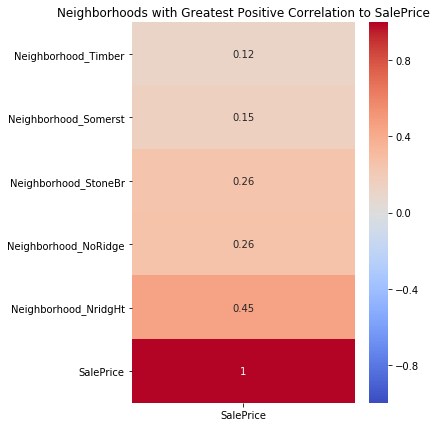

In [47]:
# check out the five neighborhood columns with the greatest negative correlation to SalePrice
# In order: 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF'

#make a heatmap
plt.figure(figsize=(5,7))
plt.title('Neighborhoods with Greatest Positive Correlation to SalePrice') #set title
sns.heatmap(neigh_train.corr()[['SalePrice']].sort_values('SalePrice').tail(6), cmap='coolwarm', annot=True, vmin=-1);
#set blue for positive

#### The neighborhoods with greatest positive correlation to SalePrice (in order)
1.  Northridge Heights 
2.  Northridge
3.  Stone Brook
4.  Somerset 
5.  Timberland

## Make sure each data set has the same columns

In [48]:
# get a list of all of the columns currently in the train dataframe
train_features = train.columns

# check this list
train_features

Index(['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       ...
       'Misc Feature_Shed', 'Misc Feature_TenC', 'Sale Type_CWD',
       'Sale Type_Con', 'Sale Type_ConLD', 'Sale Type_ConLI',
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=278)

In [49]:
# get a list of all of the columns currently in the test dataframe
test_features = test.columns

# check this list
test_features

Index(['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       ...
       'Misc Feature_Shed', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD '],
      dtype='object', length=259)

In [50]:
# function for checking if something is in one list but not another list (code by Temple Moore)
def col_checker(df1, df2):
    droplist = []
    for col in df1.columns.values.tolist():
        if col not in df2.columns.values.tolist():
            droplist.append(col)
    return droplist

In [51]:
# we want to get a data frame of train without SalesPrice so we don't add SalesPrice to test
# first create a list of all the columns currently in the train dataframe (minus 'SalePrice')
train_features = train.columns.drop('SalePrice')

# create a dataframe that is just the train data without SalePrice
Xtrain = train[train_features]

In [52]:
# make a list of dummy columns that are in train but not in test
train_to_test_dummies = col_checker(Xtrain, test) #values in train but not test 

# check the list just made
train_to_test_dummies

['MS SubClass_150',
 'MS Zoning_C (all)',
 'Utilities_NoSeWa',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Condition 2_Feedr',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Roof Matl_CompShg',
 'Roof Matl_Membran',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Exterior 2nd_Stone',
 'Bsmt Cond_Fa',
 'Bsmt Cond_Po',
 'Heating_OthW',
 'Heating_Wall',
 'Heating QC_Po',
 'Electrical_Mix',
 'Functional_Sal',
 'Functional_Sev',
 'Garage Qual_Fa',
 'Pool QC_Fa',
 'Pool QC_Gd',
 'Misc Feature_Gar2',
 'Misc Feature_TenC']

In [53]:
# make a list of dummy columns that are in test but not in train
test_to_train_dummies = col_checker(test, train) #values in test but not train

# check the list just made
test_to_train_dummies

['Roof Matl_Metal',
 'Roof Matl_Roll',
 'Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Mas Vnr Type_CBlock',
 'Heating_GasA',
 'Electrical_None',
 'Kitchen Qual_Po',
 'Sale Type_VWD']

In [54]:
## initially I added each of the dummy columns that are in test but not in train and set them 
## all to zero (since they are yess/no and do not exist in train).

## for col in test_to_train_dummies:
##     train[col] = 0
    
# i found that this gave me inaccurate results, so I tried just dropping all of these columns
# and got a better kaggle score
train.drop(columns=train_to_test_dummies, inplace=True)


In [55]:
## initially I added each of the dummy columns that are in train but not in test and set them 
## all to zero (since they are yess/no and do not exist in test).

# for col in train_to_test_dummies:
#     test[col] = 0
    
    
# i found that this gave me inaccurate results, so I tried just dropping all of these columns
# and got a better kaggle score
test.drop(columns=test_to_train_dummies, inplace=True)


In [56]:
# check the columns in the train dataframe.  notice that there are now 236
train.columns

Index(['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       ...
       'Misc Feature_Othr', 'Misc Feature_Shed', 'Sale Type_CWD',
       'Sale Type_Con', 'Sale Type_ConLD', 'Sale Type_ConLI',
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=250)

In [57]:
# check the columns in the test dataframe.  notice that there are now 235 (one less because of SalePrice)
test.columns

Index(['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       ...
       'Misc Feature_Othr', 'Misc Feature_Shed', 'Sale Type_CWD',
       'Sale Type_Con', 'Sale Type_ConLD', 'Sale Type_ConLI',
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=249)

## Features with strongest and weakest correlations to Sale Price

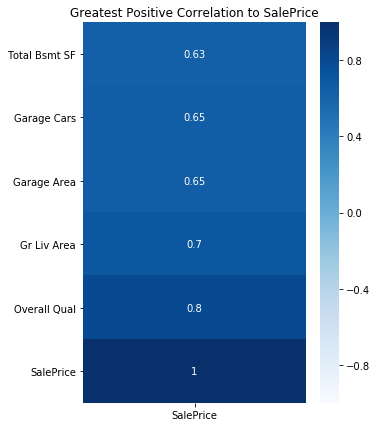

In [58]:
# check out the five columns with the greatest negative correlation to SalePrice
# In order: 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF'

#make a heatmap
plt.figure(figsize=(5,7))
plt.title('Greatest Positive Correlation to SalePrice') #set title
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice').tail(6), cmap='Blues', annot=True, vmin=-1);
#set blue for positive

#### The greatest positive correlation to SalePrice (in order)
1.  Overall Quality 
2.  Above Ground Living Area Square Footage
3.  Garage Area Square Footage 
4.  Size of garage in car capacity 
5.  Total Basement Square Footage

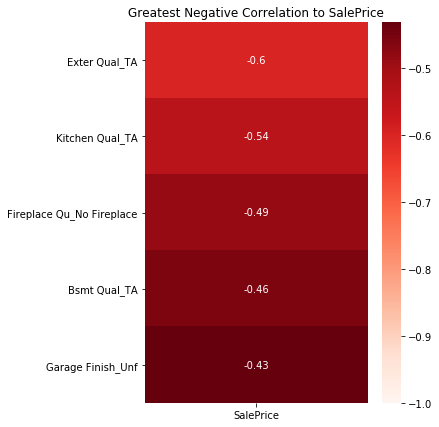

In [59]:
# check out the five columns with the greatest negative correlation to SalePrice
# In order: 'Exter Qual_TA', 'Kitchen Qual_TA', 'Fireplace Qu_No Fireplace', 'Bsmt Qual_TA', 'Garage Finish_Unf'

#make a heatmap
plt.figure(figsize=(5,7))
plt.title('Greatest Negative Correlation to SalePrice') #set title
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice').head(), cmap='Reds', annot=True, vmin=-1);
# set red for negative

#### The greatest negative correlation to SalePrice (in order)
1.  External Quality = Average/Typical 
2.  Kitchen Quality = Average/Typical
3.  Doesn't Have Fireplace
4.  Basement Quality = Average/Typical 
5.  Interior Finish of the garage = Unfinished

In [60]:
# find a dataframe of all the collumns in our train dataframe as they correlate to SalePrice, from lowest to highest
# set this under the variable corr
corr = train.corr()[['SalePrice']].sort_values('SalePrice')

# find all the columns in our new dataframe that correlate to sales price, where the correlation
# is either less than 0.05 or greater than -0.05, and set this under the variable corr_features
corr_features = corr[(corr.SalePrice < 0.05) & (corr.SalePrice > -0.05)]
 #worked with russ on this
    

# This sets the dataframe of dummy columns whose correlation to salesprice is too weak to be of use
# as a list, which we save under the variable drop_cols2
drop_cols2 = corr_features.index.values


# list all of the columns we are dropping
drop_cols2



array(['Functional_Min1', 'Exterior 1st_WdShing', 'BsmtFin Type 2_BLQ',
       'Exterior 2nd_Brk Cmn', 'Misc Feature_Shed',
       'Neighborhood_NPkVill', 'Garage Qual_Po', 'Bsmt Half Bath',
       'BsmtFin Type 2_Rec', 'House Style_SLvl', 'BsmtFin Type 2_LwQ',
       'Roof Style_Gambrel', 'Low Qual Fin SF', 'Fence_MnWw',
       'MS SubClass_85', 'Exterior 1st_Plywood', 'Heating_GasW',
       'Neighborhood_Mitchel', 'Sale Type_ConLw', 'Exterior 2nd_CBlock',
       'MS SubClass_40', 'MS Zoning_I (all)', 'Utilities_NoSewr',
       'MS Zoning_RH', 'MS SubClass_80', 'Sale Type_Oth',
       'Exterior 1st_AsphShn', 'Bsmt Qual_Po', 'Neighborhood_Blueste',
       'Condition 1_RRNe', 'Exterior 1st_BrkComm', 'Pool QC_No Pool',
       'Fireplace Qu_Fa', 'Foundation_Stone', 'Exterior 2nd_AsphShn',
       'House Style_1Story', 'Roof Style_Mansard', 'Pool QC_TA',
       'Yr Sold', 'Condition 1_RRAn', 'Lot Config_FR2', 'Alley_Pave',
       'Condition 2_Norm', 'Misc Feature_Othr', 'Misc Val',
       '

In [61]:
# drop the columns whose correlation to salesprice is too weak to be of use from our train dataframe
# NOTE: 2nd drop (for the dummy variables)
train.drop(columns=drop_cols2, inplace=True)

# check the train shape
train.shape

(2051, 176)

In [62]:
# drop the columns whose correlation to salesprice is too weak to be of use from our train dataframe
# NOTE: 2nd drop (for the dummy variables)
test.drop(columns=drop_cols2, inplace=True)

# check the train shape
test.shape

(879, 175)

## Fitting The Model

In [63]:
# set the features we will use as the columns for our X value
# notice we are dropping SalesPrice from our features because we don't want it in our X value 
# we also drop PID and Id, because in spite of their correlations they are random and will hold no sway on our prices
features = train.columns.drop(['SalePrice', 'PID', 'Id'])

#check this list
features

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Total Bsmt SF',
       ...
       'Garage Cond_Po', 'Garage Cond_TA', 'Paved Drive_P', 'Paved Drive_Y',
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_No Fence', 'Sale Type_ConLD',
       'Sale Type_New', 'Sale Type_WD '],
      dtype='object', length=173)

In [64]:
# Also drop PID and Id from the test dataframe for the same reason, and also so it is the same dimensions as train
test.drop(['PID', 'Id'], axis=1, inplace=True)

In [65]:
# Set up our X and y variables from out train data to use to train our model with

X = train[features]
y = train['SalePrice']

#check out the first 5 rows in our X
X.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Sale Type_ConLD,Sale Type_New,Sale Type_WD
0,0.0,13517,6,8,1976,2005,289.0,533.0,192.0,725.0,...,0,1,0,1,0,0,1,0,0,1
1,43.0,11492,7,5,1996,1997,132.0,637.0,276.0,913.0,...,0,1,0,1,0,0,1,0,0,1
2,68.0,7922,5,7,1953,2007,0.0,731.0,326.0,1057.0,...,0,1,0,1,0,0,1,0,0,1
3,73.0,9802,5,5,2006,2007,0.0,0.0,384.0,384.0,...,0,1,0,1,0,0,1,0,0,1
4,82.0,14235,6,8,1900,1993,0.0,0.0,676.0,676.0,...,0,1,0,0,0,0,1,0,0,1


In [66]:
# check the dimensions of our X
X.shape

(2051, 173)

In [67]:
#check out the first 5 rows in our y
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [68]:
#Use the train_test_split function to split our X and y variables into a training set and a holdout set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [69]:
#we'll want to scale our features for testing Lasso and ridge models
#fit a StandardScaler to X_train and use it to transform both  X_train and X_test
#only Xtrain and Xtest will be fit
ss= StandardScaler()
ss.fit(X_train)  #ONLY FIT TO TRAINING DATA
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test) #NOTICE NO FITTING HAPPENED HERE


# scale our features for the test DataFrame
test_test_sc = ss.transform(test)

In [70]:
#create instance of Linear Regression model
lr = LinearRegression()

# fit the scaled X_train and the y_train of our train dataframe to this linear regression instance
lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
# check the score of this linear regression model on the scaled X_train and the y_train of our train dataframe
lr.score(X_train_sc, y_train)

0.9002857854209311

In [72]:
# check the score of this linear regression model on the scaled X_test and the y_test of our train dataframe
lr.score(X_test_sc, y_test)

-5.535058946790516e+20

#### yikes *TERRIBLE* score

In [73]:
#create instance of LASSO model
lasso = LassoCV(cv=5)

# fit the scaled X_train and the y_train of our train dataframe to this LASSO instance
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [74]:
# check the score of this LASSO model on the scaled X_train and the y_train of our train dataframe
lasso.score(X_train_sc, y_train)

0.8970003194008491

In [75]:
# check the score of this LASSO model on the scaled X_test and the y_test of our train dataframe
lasso.score(X_test_sc, y_test)

0.8993561802872061

####  *MUCH* better score, and test score higher then train score (which we want)

In [76]:
#create instance of Ridge model
ridge = RidgeCV()

# fit the scaled X_train and the y_train of our train dataframe to this ridge instance
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [77]:
# check the score of this ridge model on the scaled X_train and the y_train of our train dataframe
ridge.score(X_train_sc, y_train)

0.9001546151757928

In [78]:
# check the score of this ridge model on the scaled X_test and the y_test of our train dataframe
ridge.score(X_test_sc, y_test)

0.8955998390269265

####  Very good score, test score higher then train score (which we want), but LASSO was better

In [79]:
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()

0.849701605530945

In [80]:
#predict y using the linear regression model
y_pred_lr = lr.predict(test_test_sc)

#check root mean squared error (RMSE)
#np.sqrt(mean_squared_error(y_train, y_pred))

In [81]:
#predict y using the lasso model
y_pred = lasso.predict(test_test_sc)

#check root mean squared error (RMSE)
#np.sqrt(mean_squared_error(y_test, y_pred))
print(y_pred)

[135357.94580782 147978.30108754 225009.01270957 103794.2605538
 177162.46255052  99272.63763667  94232.03588734 161344.52720832
 177763.5163905  164626.21573329 133383.6031593  125936.00781422
 146636.30094825 285219.3018453  142698.43662854 132655.33819239
 141467.3643337  119555.44934041 187932.29222361 179408.13234703
 169200.85755611 124548.80094421 170796.06031726 179971.86967927
 161629.975608   124591.1127896  125360.98202324 124477.08391823
 165303.40960062  69182.61238761  95557.77884279 101640.62331621
 186547.55617915 148629.61185446 218302.13453191 179776.68126195
 112913.25218668 102703.78527414 130502.14639476 192475.80926601
 170835.70578711 214275.9288033  148544.03587865 165089.58663848
 208978.96182319 101222.6184494  218437.64011475 126010.96727067
 145127.56731987 107752.3213547   93139.66164636 201146.61937027
 218193.3644485  116709.29030375 100434.10149051 151910.28164569
 172324.53056331 138957.61126537 170481.96442231 229475.7959985
 294743.1572215  103991.844

In [82]:
#predict y using the ridge model
y_pred_ridge = ridge.predict(test_test_sc)

#check root mean squared error (RMSE)
#np.sqrt(mean_squared_error(y_test, y_pred))
print(y_pred_ridge)

[139643.85112413 152225.6684844  223561.69599657 101656.08997471
 179229.8758578  100522.33937282  90263.18973379 169450.88917792
 178793.07064043 165486.51668266 132301.78370878 119075.42515162
 151753.41450813 292597.60310596 119627.23240931 128364.58374413
 159511.71206607 118384.87902441 186804.75888526 169683.79622429
 174877.15895297 121079.32846235 173714.46396194 173974.77064029
 148534.67706625 126453.04180584 125631.56786576 114898.5949718
 156014.17831688  71683.6170935   97587.86945696 104848.43207279
 164585.10379897 151267.96038931 219816.40722224 175095.54167435
 103147.15619726  95388.62581635 134290.61033532 190678.53265515
 170325.76426608 213654.35527591 145510.74126398 160910.62330389
 211503.17166922 109825.23070722 219005.06550237 135757.96282181
 146885.66915141 105684.71567235  84844.92496981 192810.58043163
 218640.75479619 114649.64557137  96642.72652485 152671.60046835
 165284.75918593 140993.45225669 172731.73819946 231127.7905384
 292554.38548479 113698.352

In [83]:
#change back to drop Id and PID depending on code
#################test_features = test.columns.drop(['Id', 'PID'])
# dropping Id and PID because they hold no sway on our prices
test_features = test.columns

test_features

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Total Bsmt SF',
       ...
       'Garage Cond_Po', 'Garage Cond_TA', 'Paved Drive_P', 'Paved Drive_Y',
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_No Fence', 'Sale Type_ConLD',
       'Sale Type_New', 'Sale Type_WD '],
      dtype='object', length=173)

In [84]:
features

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Total Bsmt SF',
       ...
       'Garage Cond_Po', 'Garage Cond_TA', 'Paved Drive_P', 'Paved Drive_Y',
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_No Fence', 'Sale Type_ConLD',
       'Sale Type_New', 'Sale Type_WD '],
      dtype='object', length=173)

In [85]:
train[test_features].shape

(2051, 173)

In [86]:
test[features].shape

(879, 173)

In [87]:
test[test_features].shape

(879, 173)

In [88]:
test[features].head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Sale Type_ConLD,Sale Type_New,Sale Type_WD
0,69.0,9142,6,8,1910,1950,0.0,0,1020,1020,...,1,0,0,1,0,0,1,0,0,1
1,0.0,9662,5,4,1977,1977,0.0,0,1967,1967,...,0,1,0,1,0,0,1,0,0,1
2,58.0,17104,7,5,2006,2006,0.0,554,100,654,...,0,1,0,1,0,0,1,0,1,0
3,60.0,8520,5,6,1923,2006,0.0,0,968,968,...,0,1,0,0,0,0,1,0,0,1
4,0.0,9500,6,5,1963,1963,247.0,609,785,1394,...,0,1,0,1,0,0,1,0,0,1


In [89]:
test[features].head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,...,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Sale Type_ConLD,Sale Type_New,Sale Type_WD
0,69.0,9142,6,8,1910,1950,0.0,0,1020,1020,...,1,0,0,1,0,0,1,0,0,1
1,0.0,9662,5,4,1977,1977,0.0,0,1967,1967,...,0,1,0,1,0,0,1,0,0,1
2,58.0,17104,7,5,2006,2006,0.0,554,100,654,...,0,1,0,1,0,0,1,0,1,0
3,60.0,8520,5,6,1923,2006,0.0,0,968,968,...,0,1,0,0,0,0,1,0,0,1
4,0.0,9500,6,5,1963,1963,247.0,609,785,1394,...,0,1,0,1,0,0,1,0,0,1


In [90]:
#mean
#ybar = test.SalePrice.mean()

## Preparing Submissions To Submit to Kaggle

In [91]:
#read clean_test.csv into 'test' to get id values
clean_test = pd.read_csv('./datasets/clean_test.csv')

In [92]:
# predictions for sales price
yhat = lasso.predict(test[features])
yhat

array([5.18681357e+07, 5.52237589e+07, 5.13164383e+07, 3.63431382e+07,
       4.62808251e+07, 3.24027352e+07, 3.82293027e+07, 4.26231312e+07,
       4.36992250e+07, 4.33162939e+07, 3.99741140e+07, 3.65406158e+07,
       4.57686721e+07, 6.55676129e+07, 5.21242120e+07, 4.12128969e+07,
       4.53551912e+07, 3.90848689e+07, 5.27432807e+07, 5.53803083e+07,
       3.82836631e+07, 3.46390738e+07, 4.76859369e+07, 4.70602075e+07,
       4.20164375e+07, 3.36197234e+07, 5.10993458e+07, 4.81409608e+07,
       3.84994489e+07, 2.65053043e+07, 3.36501754e+07, 3.78472991e+07,
       6.56048856e+07, 4.15740060e+07, 4.92784016e+07, 4.76408083e+07,
       4.50372137e+07, 3.53845584e+07, 3.43174313e+07, 4.27198614e+07,
       3.66880923e+07, 5.32857862e+07, 4.14040121e+07, 4.86373820e+07,
       4.36720192e+07, 3.60907626e+07, 5.20813173e+07, 3.58699549e+07,
       3.44956544e+07, 3.69448224e+07, 4.13143313e+07, 5.57572519e+07,
       4.93993913e+07, 4.11848600e+07, 3.72516052e+07, 3.72392628e+07,
      

In [93]:
# Get the Id column for the test data from the untouched test dataframe set aside at the begining
# save as our submissions head, as per the requirements of the Kaggle competition
submission_pd = pd.DataFrame(clean_test.Id)

In [94]:
# check the first five values of our submission header
submission_pd.head(5)

,Id
0,2658
1,2718
2,2414
3,1989
4,625


In [95]:
# set the SalesPrice column of our submission to be the predictions made by our LASSO model
submission_pd['SalePrice'] = y_pred

In [96]:
# check the first five rows of our full submission datafram
submission_pd.head(5)

,Id,SalePrice
0,2658,135357.945808
1,2718,147978.301088
2,2414,225009.012710
3,1989,103794.260554
4,625,177162.462551


In [97]:
# save our submission dataframe to the file submission.csv, which is now formatted to be submitted to Kaggle
submission_pd.to_csv('./datasets/submission.csv', index=False)

# Conclusions and Recommendations

The cleaning of this data was rigorous and occasionally not completely obvious.  While the provided document [Ames Housing .txt file](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) alluded to null values in regards to alley access, basement, fireplace, garage, pool, fence, and other miscellaneous features (which were switched to mark as 'none'), and thus to descriptive factors of those features (which were marked to integer values of 0), there were other null values that took more exploration to discover.  Masonry Veneer Type was listed in the [Ames Housing .txt file](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) as being marked "none" for an absence of the feature, but this was not the case as those values were left null, discovered only by the fact that the same amount of cells for Masonry Veneer area were also null in the provided training data document.  The remaining total null values in that document happened to be equal to the amount of null values for Lot Frontage (marked to 0), and there was one null value for a single cell in the Electrical Sytem column in a single row of the testing data, also marked to 0.

Then, using dummy variables, I converted the qualitative features into something numeric that could be used by a computer to find the correlation between that data and the sales price.  This produced a lot of new columns, many which were in the training data but not the testing data, and vice versa (this was due to values under the qualitative categories that existed in the column of one but not the other, such as a roof material value of metal (which was in at least one house in the testing data but not for any in the training data) or the roof material made of membrane (which was in the training data but not the testing data).  I tried setting these values where they were missing to 0 (since they were dummy variables with a value of 1 or 0, where 0 signified not having said quality), but for some reason this gave me a worse fitting models and worse [Kaggle](https://www.kaggle.com/c/dsi-us-8-project-2-regression-challenge/) scores, so I just dropped those dummy columns.

Based on the final data, I analyzed factors that affected the price in the training data.  The features that had the greatest positive correlation with price were (in order) Overall Quality, the Above Ground Living Area Square Footage, the Garage Area Square Footage, the Size of garage (in car capacity), and the Total Basement Square Footage.  The features that had the greatest negative correlation with price were (in order) having an External Quality ranked Average or Typical, having a Kitchen with Quality ranked as Average or Typical, the absence of a Fireplace, the quality of the Basement being ranked as Average or Typical, and having a garage with an unfinished Interior.  All of these results made logical sense and seemed quite obvious.  Analyzing only the neighborhood dummy variables correlation with price, I found the the top 5 neighborhoods with a positive effect on the sales price were (in order) Northridge Heights, Northridge, Stone Brook, Somerset, and Timberland.

I fiddled around with filtering out some of the data by low correlation, and through much testing, found I acheived the best results filter out features that had less than 5% positive correlation and more than -5% negative correlation.  I also dropped Id and PID, because even though they had a relatively ok correlation with price in the training data, they were random numbers that had no actual impact on the price, and dropping them improved my results.  When fitting a model to a train-test-split of this enhanced training data, I tried a linear regression model, a LASSO model, and a ridge model.  The linear regression model worked TERRIBLY (probably because I used a LOT of features - 173 features to be precise).  The ridge and LASSO models worked much, much better (which was not unexpected as they are more refined and filter out noise that comes from having so many features.  In the end, the LASSO model worked the best, and got a score of 0.897 on the training data's training data and a score of 0.899 on the training data's testing data (note to self: next time rename the variables containing the data).  When formatted and submitted to the [Kaggle contest](https://www.kaggle.com/c/dsi-us-8-project-2-regression-challenge/) I only got a score of 27658.196; which makes sense because the model was obviously overfitted and the [Kaggle contest](https://www.kaggle.com/c/dsi-us-8-project-2-regression-challenge/) was judged by the Root Mean Squared Error.

## Source Documentation

- [Kaggle's DSI-US-8 Project 2 Regression Challenge](https://www.kaggle.com/c/dsi-us-8-project-2-regression-challenge/)
- [Ames Housing .txt file](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
